# Delays With Aging Dataset

* xlsx used is: fa_delays_7nm_aging.xlsx
* converted to DelaysWithAging.csv
* Removed fF from all rows in cload

In [1]:
import pandas as pd
from pandas import read_excel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error 
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

## Reading csv and shuffling

In [10]:
df_delay=pd.read_csv("../data/DelaysWithAging.csv", sep=",")
# df_delay = df_delay.drop(['yrs'], axis=1)
df_delay = shuffle(df_delay)
df_delay.head(5)

yrs       temp      pvdd     cload        nbodyn          nsdp  \
196     6  12.218383  0.665588  2.160760  9.650000e+21  3.010000e+26   
664     8  37.992965  0.731257  2.697841  9.890000e+21  2.930000e+26   
1532    0 -46.200763  0.686807  1.567205  9.880000e+21  3.190000e+26   
9099    0 -50.424389  0.703074  0.235157  1.030000e+22  2.890000e+26   
6783    4  39.318449  0.716214  0.849097  9.670000e+21  3.000000e+26   

           nc0subn         toxpn         hfinp       ni0subp  ...  \
196   2.940000e+25  1.230000e-09  1.770000e-08  1.110000e+16  ...   
664   2.760000e+25  1.210000e-09  1.860000e-08  1.110000e+16  ...   
1532  2.740000e+25  1.180000e-09  1.840000e-08  1.070000e+16  ...   
9099  2.880000e+25  1.210000e-09  1.810000e-08  1.100000e+16  ...   
6783  3.050000e+25  1.160000e-09  1.750000e-08  1.080000e+16  ...   

            nbodyp         hfinn         tfinp       nc0subp  \
196   1.000000e+22  1.770000e-08  6.610000e-09  2.940000e+25   
664   1.080000e+22  1.780000e-08  6.260000e-09  2.950000e+25   
1532  1.000000e+22  1.780000e-08  6.400000e-09  2.690000e+25   
9099  9.870000e+21  1.790000e-08  6.460000e-09  2.890000e+25   
6783  1.050000e+22  1.840000e-08  6.280000e-09  2.830000e+25   

      delay_lh_nodeaco  delay_hl_nodeaco  delay_lh_nodebco  delay_hl_nodebco  \
196       2.240000e-11      1.640000e-11      2.160000e-11      1.620000e-11   
664       1.970000e-11      1.390000e-11      1.870000e-11      1.370000e-11   
1532      1.450000e-11      1.030000e-11      1.370000e-11      1.030000e-11   
9099      1.390000e-11      9.640000e-12      1.260000e-11      9.420000e-12   
6783      1.130000e-11      8.160000e-12      1.050000e-11      8.060000e-12   

      delay_lh_nodecco  delay_hl_nodecco  
196       2.060000e-11      1.580000e-11  
664       1.830000e-11      1.370000e-11  
1532      1.320000e-11      1.020000e-11  
9099      1.280000e-11      9.870000e-12  
6783      9.970000e-12      8.110000e-12  

[5 rows x 27 columns]

In [11]:
df_delay.columns

Index(['yrs', 'temp', 'pvdd', 'cload', 'nbodyn', 'nsdp', 'nc0subn', 'toxpn',
       'hfinp', 'ni0subp', 'eotn', 'lg', 'ni0subn', 'toxpp', 'nsdn', 'tfinn',
       'eotp', 'nbodyp', 'hfinn', 'tfinp', 'nc0subp', 'delay_lh_nodeaco',
       'delay_hl_nodeaco', 'delay_lh_nodebco', 'delay_hl_nodebco',
       'delay_lh_nodecco', 'delay_hl_nodecco'],
      dtype='object')

## Setting global variables (train/val lengths & input/output columns)

In [12]:
print(len(df_delay))
train_length = int(0.8*len(df_delay))
val_length = len(df_delay) - train_length
print(train_length, val_length)
input_columns=21
output_columns=6

19996
15996 4000


## Creating training dataset

In [13]:
dataset_delay = df_delay.values
X_delay = dataset_delay[:train_length,0:input_columns]
y_delay = dataset_delay[:train_length,input_columns:]

## Data analysation using Correlation Maps

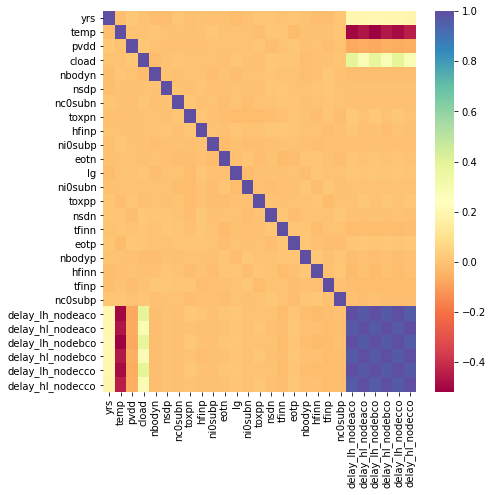

In [14]:
plt.figure(figsize=(7,7))
cor = df_delay.corr()
sns.heatmap(cor, cmap=plt.cm.Spectral)
plt.show()

## Data analysation using Spearmans/Pearsons coefficients

In [15]:
for j in range(output_columns):
    print(df_delay.columns[input_columns+j])
    print()
    for i in range(input_columns):
        corr1, _ = spearmanr(X_delay[:,i], y_delay[:,j])
        corr2, _ = pearsonr(X_delay[:,i], y_delay[:,j])
        if(abs(corr1)> 0.02 or abs(corr2)> 0.02 ):
            print(df_delay.columns[i]+":\t",'Spearmans correlation: %.3f' % abs(corr1), 'Pearsons correlation: %.3f' % abs(corr2) )
    print()

delay_lh_nodeaco

yrs:	 Spearmans correlation: 0.174 Pearsons correlation: 0.201
temp:	 Spearmans correlation: 0.541 Pearsons correlation: 0.505
pvdd:	 Spearmans correlation: 0.082 Pearsons correlation: 0.073
cload:	 Spearmans correlation: 0.650 Pearsons correlation: 0.386

delay_hl_nodeaco

yrs:	 Spearmans correlation: 0.194 Pearsons correlation: 0.199
temp:	 Spearmans correlation: 0.584 Pearsons correlation: 0.470
pvdd:	 Spearmans correlation: 0.082 Pearsons correlation: 0.067
cload:	 Spearmans correlation: 0.599 Pearsons correlation: 0.287

delay_lh_nodebco

yrs:	 Spearmans correlation: 0.179 Pearsons correlation: 0.204
temp:	 Spearmans correlation: 0.565 Pearsons correlation: 0.517
pvdd:	 Spearmans correlation: 0.084 Pearsons correlation: 0.073
cload:	 Spearmans correlation: 0.631 Pearsons correlation: 0.381

delay_hl_nodebco

yrs:	 Spearmans correlation: 0.194 Pearsons correlation: 0.198
temp:	 Spearmans correlation: 0.591 Pearsons correlation: 0.467
pvdd:	 Spearmans correlation: 

## Data scaling

In [16]:
scalarX_delay, scalarY_delay = MinMaxScaler(), MinMaxScaler()
scalarX_delay.fit(X_delay)
scalarY_delay.fit(y_delay.reshape(train_length,output_columns))
X_delay = scalarX_delay.transform(X_delay)
y_delay = scalarY_delay.transform(y_delay.reshape(train_length,output_columns))

## Training the model

In [17]:
model_delay = Sequential()
model_delay.add(Dense(32, input_dim=input_columns, activation='relu'))
model_delay.add(Dense(64,activation='relu'))
model_delay.add(Dense(128,activation='relu'))
model_delay.add(Dense(256,activation='relu'))
# model_delay.add(Dense(128,activation='relu'))
# model_delay.add(Dense(256,activation='relu'))
model_delay.add(Dense(32, activation='relu'))
model_delay.add(Dense(16, activation='relu'))
model_delay.add(Dense(output_columns, activation='linear'))
model_delay.compile(loss='mse', optimizer='adam')
output = model_delay.fit(X_delay, y_delay, epochs=200, verbose=1)

Epoch 1/200
500/500 [==============================] - 0s 823us/step - loss: 0.0015
Epoch 2/200
500/500 [==============================] - 0s 804us/step - loss: 0.0012
Epoch 3/200
500/500 [==============================] - 0s 799us/step - loss: 0.0011
Epoch 4/200
500/500 [==============================] - 0s 804us/step - loss: 8.9889e-04
Epoch 5/200
500/500 [==============================] - 0s 797us/step - loss: 8.4879e-04
Epoch 6/200
500/500 [==============================] - 0s 796us/step - loss: 8.6754e-04
Epoch 7/200
500/500 [==============================] - 0s 848us/step - loss: 8.2460e-04
Epoch 8/200
500/500 [==============================] - 0s 952us/step - loss: 7.6245e-04
Epoch 9/200
500/500 [==============================] - 0s 900us/step - loss: 7.6759e-04
Epoch 10/200
500/500 [==============================] - 0s 872us/step - loss: 7.0977e-04
Epoch 11/200
500/500 [==============================] - 0s 821us/step - loss: 7.4212e-04
Epoch 12/200
500/500 [====================

500/500 [==============================] - 0s 813us/step - loss: 3.6599e-04
Epoch 94/200
500/500 [==============================] - 0s 911us/step - loss: 3.6824e-04
Epoch 95/200
500/500 [==============================] - 0s 920us/step - loss: 3.6797e-04
Epoch 96/200
500/500 [==============================] - 0s 797us/step - loss: 3.6335e-04
Epoch 97/200
500/500 [==============================] - 1s 1ms/step - loss: 3.9247e-04
Epoch 98/200
500/500 [==============================] - 1s 1ms/step - loss: 4.3445e-04
Epoch 99/200
500/500 [==============================] - 0s 923us/step - loss: 3.3241e-04
Epoch 100/200
500/500 [==============================] - 0s 837us/step - loss: 3.4591e-04
Epoch 101/200
500/500 [==============================] - 0s 851us/step - loss: 4.2475e-04
Epoch 102/200
500/500 [==============================] - 0s 912us/step - loss: 3.7289e-04
Epoch 103/200
500/500 [==============================] - 0s 846us/step - loss: 3.3151e-04
Epoch 104/200
500/500 [===========

500/500 [==============================] - 0s 872us/step - loss: 2.0866e-04
Epoch 185/200
500/500 [==============================] - 0s 849us/step - loss: 2.3073e-04
Epoch 186/200
500/500 [==============================] - 0s 784us/step - loss: 3.9325e-04
Epoch 187/200
500/500 [==============================] - 0s 836us/step - loss: 2.6222e-04
Epoch 188/200
500/500 [==============================] - 0s 949us/step - loss: 2.1558e-04
Epoch 189/200
500/500 [==============================] - 0s 807us/step - loss: 2.3336e-04
Epoch 190/200
500/500 [==============================] - 0s 869us/step - loss: 2.1287e-04
Epoch 191/200
500/500 [==============================] - 0s 840us/step - loss: 2.3416e-04
Epoch 192/200
500/500 [==============================] - 0s 817us/step - loss: 2.8610e-04
Epoch 193/200
500/500 [==============================] - 0s 829us/step - loss: 2.3349e-04
Epoch 194/200
500/500 [==============================] - 0s 846us/step - loss: 2.6386e-04
Epoch 195/200
500/500 [=

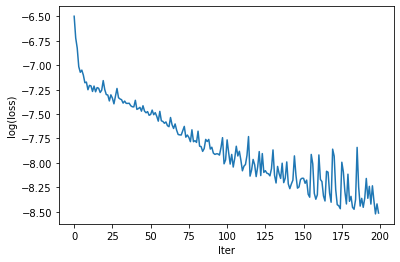

In [18]:
plt.plot(range(0,200),np.log(output.history['loss']))
plt.xlabel("Iter")
plt.ylabel("log(loss)")
plt.show()

## Predictions

In [19]:
X_test_delay = dataset_delay[train_length:,0:input_columns]
y_test_delay = dataset_delay[train_length:,input_columns:]

X_test_delay = scalarX_delay.transform(X_test_delay)
y_testpred_delay = model_delay.predict(X_test_delay)
y_testpred2_delay = scalarY_delay.inverse_transform(y_testpred_delay)

y_trainpred_delay = model_delay.predict(X_delay)
y_trainpred2_delay = scalarY_delay.inverse_transform(y_trainpred_delay)

y_2_delay = scalarY_delay.inverse_transform(y_delay)

## Model Evaluation

In [20]:
for i in range(output_columns):
    r2_train = r2_score(y_trainpred2_delay[:,i], y_2_delay[:,i])
    r2_test = r2_score(y_testpred2_delay[:,i], y_test_delay[:,i])
    print("Train R2 Score for "+df_delay.columns[input_columns+i]+" : "+str(r2_train))
    print("Test  R2 Score for "+df_delay.columns[input_columns+i]+" : "+str(r2_test))
    print()

Train R2 Score for delay_lh_nodeaco : 0.930047902870428
Test  R2 Score for delay_lh_nodeaco : 0.7037361772543433

Train R2 Score for delay_hl_nodeaco : 0.9391595399660313
Test  R2 Score for delay_hl_nodeaco : 0.6984171922953308

Train R2 Score for delay_lh_nodebco : 0.9294928589591761
Test  R2 Score for delay_lh_nodebco : 0.7033385544365982

Train R2 Score for delay_hl_nodebco : 0.9396003942178519
Test  R2 Score for delay_hl_nodebco : 0.6975591261481798

Train R2 Score for delay_lh_nodecco : 0.9314441153351297
Test  R2 Score for delay_lh_nodecco : 0.7059487137659661

Train R2 Score for delay_hl_nodecco : 0.9406328457600546
Test  R2 Score for delay_hl_nodecco : 0.6942350384064506



In [21]:
sum=0
count=0
for i in range(train_length):
    for j in range(output_columns):        
        error = abs(y_trainpred2_delay[i,j] - y_2_delay[i,j])/(y_2_delay[i,j])
        sum+=error
print("Mean Train error: {:.2f} %".format(sum/(train_length*output_columns) * 100))

Mean Train error: 6.82 %


In [22]:
sum=0
count=0
for i in range(val_length):
    for j in range(output_columns):  
        error = abs(y_testpred2_delay[i,j] - y_test_delay[i,j])/(y_test_delay[i,j])
        sum+=error    
print("Mean Test error: {:.2f} %".format(sum/(val_length*output_columns) * 100))

Mean Test error: 11.19 %
